In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import kagglehub
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('A:/1 - DS phyton/учебные датасеты/taxi_trip_pricing.csv')
df
df = df.dropna(subset=['Trip_Price'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       901 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        903 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              907 non-null    float64
 7   Per_Km_Rate            907 non-null    float64
 8   Per_Minute_Rate        902 non-null    float64
 9   Trip_Duration_Minutes  905 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


In [5]:
df['Time_of_Day'] = df['Time_of_Day'].replace({
    'Morning': 0,      
    'Afternoon': 1,   
    'Evening': 2,      
    'Night': 3         
})

C:\Users\User\AppData\Local\Temp\ipykernel_13972\3273435845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Time_of_Day'] = df['Time_of_Day'].replace({


In [6]:
df['Day_of_Week'] = df['Day_of_Week'].replace({
    'Weekday': 0,      
    'Weekend': 1        
})

C:\Users\User\AppData\Local\Temp\ipykernel_13972\1041851966.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_of_Week'] = df['Day_of_Week'].replace({


In [7]:
df['Traffic_Conditions'] = df['Traffic_Conditions'].replace({
    'Low': 0,      
    'Medium': 1,   
    'High': 2         
})

C:\Users\User\AppData\Local\Temp\ipykernel_13972\1539406332.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Traffic_Conditions'] = df['Traffic_Conditions'].replace({


In [8]:
df['Weather'] = df['Weather'].replace({
    'Snow': 0,      
    'Rain': 1,   
    'Clear': 2         
})

C:\Users\User\AppData\Local\Temp\ipykernel_13972\1093815112.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weather'] = df['Weather'].replace({


In [9]:
for column in df.select_dtypes(include=['number']).columns:
    df[column] = df[column].fillna(df[column].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    float64
 2   Day_of_Week            951 non-null    float64
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    float64
 5   Weather                951 non-null    float64
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(11)
memory usage: 89.2 KB


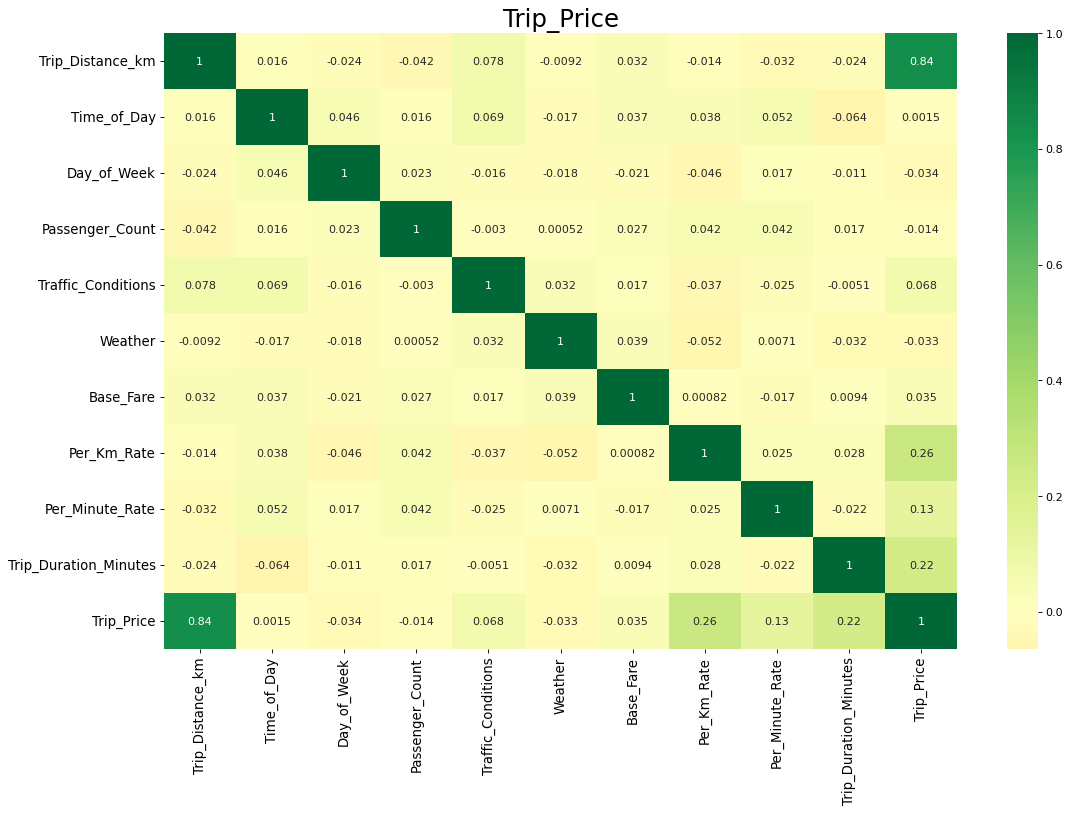

In [11]:
heatdf  = df

plt.figure(figsize=(16,10), dpi= 80)
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Trip_Price', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
# линейная регрессия

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

y = df['Trip_Price']
x = df.drop(columns = ['Trip_Price'])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x_test)

print("constant: ",reg.intercept_)
print("coefficient: ",reg.coef_)
mse = mean_squared_error(y_test, y_pred)
print('MSE', mse)
mae = mean_absolute_error(y_test, y_pred)
print('MAE', mae)
r2 = r2_score(y_test, y_pred) * 100
print(f"R² score: {r2:.2f}%")
cv_scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f}")

constant:  -59.16900412983635
coefficient:  [ 1.76250660e+00 -7.56438972e-01  2.82381524e-02  1.44812082e-02
  1.00545350e+00 -4.08945655e-01  4.32968177e-01  2.56032049e+01
  5.83314006e+01  3.00847683e-01]
MSE 271.85593941891125
MAE 9.934589253163352
R² score: 88.37%
Cross-validation scores: [0.8705519  0.90016827 0.85348039 0.83085262 0.78281021]
Average CV score: 0.848


In [16]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"Глубина дерева: {model.get_depth()}")
print(f"Количество листьев: {model.get_n_leaves()}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² score: {r2_score(y_test, y_pred) * 100:.2f}%")
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f}")

Глубина дерева: 20
Количество листьев: 760
MSE: 350.55
MAE: 10.46
R² score: 85.00%
Cross-validation scores: [0.89081007 0.88309929 0.74976392 0.79168048 0.82434185]
Average CV score: 0.828


In [17]:
# Улучшаем DecisionTreeRegressor

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform
import numpy as np

param_dist = {
    'max_depth': randint(3, 50),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 30),
    'max_features': ['sqrt', 'log2', None] + list(np.arange(0.1, 1.0, 0.1)),
    'min_impurity_decrease': uniform(0, 0.1),
    'ccp_alpha': uniform(0, 0.02)  # Прунинг
}

random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(x_train, y_train)

print(f"\nRandomizedSearch лучший R²: {random_search.best_score_:.4f}")
print(f"Лучшие параметры: {random_search.best_params_}")

best_model = random_search.best_estimator_

print("Детальная кросс-валидация лучшей модели:")
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")

# Оценка на тестовых данных
print("Оценка на тестовых данных:")
y_pred = best_model.predict(x_test)
print(f"Test R² score: {r2_score(y_test, y_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomizedSearch лучший R²: 0.8823
Лучшие параметры: {'ccp_alpha': np.float64(0.01099057764647471), 'max_depth': 7, 'max_features': None, 'min_impurity_decrease': np.float64(0.08877041827582999), 'min_samples_leaf': 11, 'min_samples_split': 12}
Детальная кросс-валидация лучшей модели:
Cross-validation scores: [0.90886161 0.91909655 0.84102737 0.86325129 0.87931444]
Оценка на тестовых данных:
Test R² score: 0.9131
Test MSE: 203.0106
Test MAE: 9.7957


In [20]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(
    n_estimators=100,  
    random_state=42,
    max_depth=None,    
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1  
)

# Обучаем модель
rf_reg.fit(x_train, y_train)

# Предсказания
y_pred = rf_reg.predict(x_test)

# Оценка модели
print(f"Количество деревьев: {rf_reg.n_estimators}")

mse = mean_squared_error(y_test, y_pred)
print(f"\nMSE: {mse:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')
r2 = r2_score(y_test, y_pred) * 100
print(f"R² score: {r2:.2f}%")


cv_scores = cross_val_score(rf_reg, x_train, y_train, cv=5, scoring='r2')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f}")
print(f"Std CV score: {cv_scores.std():.3f}")
print(f"Range: {cv_scores.min():.3f} - {cv_scores.max():.3f}")

Количество деревьев: 100

MSE: 129.09
MAE: 6.18
R² score: 94.48%

Cross-validation scores: [0.95179768 0.94810283 0.87500059 0.91938304 0.91525105]
Average CV score: 0.922
Std CV score: 0.028
Range: 0.875 - 0.952


In [19]:
# Улчшаем RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, 0.9],
    'bootstrap': [True, False]
}

# Создаем модель для поиска
rf_search = RandomForestRegressor(random_state=42, n_jobs=-1)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_search,
    param_distributions=param_dist,
    n_iter=50,  # Проверяем 50 случайных комбинаций
    cv=3,       # 3 фолда для скорости
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(x_train, y_train)

print(f"\nЛучшие параметры: {random_search.best_params_}")
print(f"Лучший CV R²: {random_search.best_score_:.4f}")

best_rf = random_search.best_estimator_

cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"CV scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f}")
print(f"Std CV score: {cv_scores.std():.4f}")
print(f"Min CV score: {cv_scores.min():.4f}")
print(f"Max CV score: {cv_scores.max():.4f}")

# Оценка на тестовых данных
best_rf.fit(x_train, y_train)
y_pred_best = best_rf.predict(x_test)

r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"\nTest R²: {r2_best:.4f}")
print(f"Test MSE: {mse_best:.4f}")
print(f"Test MAE: {mae_best:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits

Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None, 'bootstrap': False}
Лучший CV R²: 0.9240
CV scores: [0.93238546 0.95339928 0.87638969 0.92623103 0.91955865]
Average CV score: 0.9216
Std CV score: 0.0253
Min CV score: 0.8764
Max CV score: 0.9534

Test R²: 0.9223
Test MSE: 181.6758
Test MAE: 6.5024


In [21]:
#catboost

from catboost import CatBoostRegressor
from catboost import cv, Pool


model = CatBoostRegressor(
    iterations=500,           # Количество деревьев
    learning_rate=0.05,       # Скорость обучения
    depth=6,                  # Глубина деревьев
    loss_function='RMSE',     # Функция потерь для регрессии
    eval_metric='R2',         # Метрика оценки для регрессии
    random_seed=42,           # Для воспроизводимости
    l2_leaf_reg=3,            # L2 регуляризация
    early_stopping_rounds=50, # Ранняя остановка
    use_best_model=True,      # Использовать лучшую модель
    verbose=100,              # Вывод информации
    task_type='CPU',          # Можно изменить на 'GPU' если есть видеокарта
    cat_features=None         # Явно указываем, что нет категориальных признаков              
)

model.fit(
    x_train, y_train,
    eval_set=(x_test, y_test),
    verbose=100
)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}%")

cv_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

cv_scores = cross_val_score(cv_model, x_train, y_train, cv=5, scoring='r2', n_jobs=1)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f}")

model.fit(
    x_train, y_train,
    eval_set=(x_test, y_test),
    verbose=100
)

0:	learn: 0.0632837	test: 0.0427538	best: 0.0427538 (0)	total: 313ms	remaining: 2m 36s
100:	learn: 0.9652423	test: 0.8403709	best: 0.8403709 (100)	total: 500ms	remaining: 1.97s
200:	learn: 0.9838113	test: 0.8767539	best: 0.8767539 (200)	total: 655ms	remaining: 974ms
300:	learn: 0.9885083	test: 0.8815210	best: 0.8815659 (295)	total: 820ms	remaining: 542ms
400:	learn: 0.9915200	test: 0.8824881	best: 0.8824881 (400)	total: 972ms	remaining: 240ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8826046219
bestIteration = 403

Shrink model to first 404 iterations.
MSE: 274.40
MAE: 5.64
R² score: 88.26%
Cross-validation scores: [0.86439211 0.91042286 0.9459161  0.87593114 0.90257763]
Average CV score: 0.900
0:	learn: 0.0632837	test: 0.0427538	best: 0.0427538 (0)	total: 1.88ms	remaining: 938ms
100:	learn: 0.9652423	test: 0.8403709	best: 0.8403709 (100)	total: 153ms	remaining: 603ms
200:	learn: 0.9838113	test: 0.8767539	best: 0.8767539 (200)	total: 306ms	remaining: 456ms
300

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_original = y_test.values 

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mae',  
    metrics=['mae', 'mse'] 
)

model.summary()

# Обучение модели
print("\nНачало обучения...")
history = model.fit(
    x_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

y_pred_scaled = model.predict(x_test_scaled).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()


# Метрики
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred) * 100

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}%")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)


Начало обучения...
Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.5831 - mae: 0.5831 - mse: 0.8637 - val_loss: 0.4090 - val_mae: 0.4090 - val_mse: 0.6936
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4015 - mae: 0.4015 - mse: 0.4289 - val_loss: 0.3027 - val_mae: 0.3027 - val_mse: 0.4256
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3275 - mae: 0.3275 - mse: 0.2952 - val_loss: 0.2512 - val_mae: 0.2512 - val_mse: 0.3697
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2866 - mae: 0.2866 - mse: 0.2420 - val_loss: 0.2215 - val_mae: 0.2215 - val_mse: 0.2530
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2574 - mae: 0.2574 - mse: 0.1462 - val_loss: 0.1930 - val_mae: 0.1930 - val_mse: 0.1895
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2409 - mae: 0.2409 - mse: 0.1250 - val_loss: 0.1964 - val_mae: 0.1964 - val_mse: 0.1960
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2196 - mae: 0.2196 - 